# **Stats 131 Final Project**

## Bae's Classy Fire
- Presentation: https://docs.google.com/presentation/d/1Y38C9so2U9U9VXOwPMMe0VqJcvbjqPYwgUbtuPM0R_E/edit?usp=sharing
- YouTube Video: https://youtu.be/Nf_wXXmOMhA
    
### Ziv Schwartz, Daniel Meier, Jeremy Milkes

#### *University of California, Los Angeles*

#### June 12th, 2018

# **I. Context and Description of the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1) Background Information
This dataset comes from the University of California, Irvine's massive archive of Machine Learning Datasets. Our group decided on a Wine Quality Dataset that focuses on the Portuguese "Vinho Verde" Wine. Vinho Verde is not a grape variety, it is a DOC (Denominação de Origem Controladafor) of the production of wine -- implying that the wine originated from that area (the Minho Province in the northwest of Portugal). [1] Medium in alcohol, Vinho Verde is particularly appreciated due to its freshness (specially in the summer). This wine accounts for 15% of the total Portuguese production, and around 10% is exported, mostly white wine. A straight translation means "green wine" but it actually implies a "young wine", one that is consumed shortly after bottling. [1] 

There are two datasets, one focusing on Red and the other on White wine. The red wine dataset has 1599 entries and the white wine dataset has 4898 entries over 12 features. The features are:
   - 1 - fixed acidity
   - 2 - volatile acidity
   - 3 - citric acid
   - 4 - residual sugar
   - 5 - chlorides
   - 6 - free sulfur dioxide
   - 7 - total sulfur dioxide
   - 8 - density
   - 9 - pH
   - 10 - sulphates
   - 11 - alcohol
   - Output variable (based on sensory data): 
   - 12 - quality (score between 0 and 10)
   

### 2) Information About Data 

#### Who collected the data
  - The data were collected by the Commission of Viticulture of the Vinho Verde Region (CVRVV). The CVRVV is an inter professional organization with the goal of improving the quality and marketing of vinho verde. Only protected designation origin samples that were tested at the official certification entity (CVRVV) were used in the study. Paolo Cortez, an Associate Professor at the University of Minho, used this dataset to conduct a study to model wine preferences by data mining from physicochemical properties. [2]
    
#### When the data was collected
  - The data were collected between May 2004 to February 2007. [2]
    
#### How the data was collected
  - The data were recorded by a computerized system (iLab), which automatically manages the process of wine sample testing from producer requests to laboratory and sensory analysis. Each entry denotes a given test (analytical or sensory) and the final database was exported into a single sheet (.csv). [2]

#### Any implications this may have on analysis
  - Since finishing the data collection in 2008, Vinho Verde exports to the US have significantly increased. More generally, the proportion of Vinho Verde wines now being exported has risen from 15% to 35% of total production. [3] It should also be noted that taste is a very hard thing to classify and it is the least understood of the human senses. Because of this, wine classification is a difficult task. Moreover, the relationships between the physicochemical and sensory analysis are complex and still not fully understood. [2]  

## **II. Exploratory Analysis of the Data**

1. Summary statistics and the distributional shape of variables in the data
2. Unusual features or outliers present in the data
3. Potential relationships that may exist in the data, including, but not limited to:
   - a. two-way tables and side-by-side bar charts for relationships between categorical data
   - b. scatter plots for relationships between numeric data
   - c. side-by-side histograms or boxplots for relationships between numeric and categorical data
4. Findings should be reported with readable tables or clearly labeled graphs.
5. There must also be text to explain the findings and the included tables.

The exploratory data analysis should be guided by a series of guiding questions or curiosities. Each
question need not uncover a significant relationship, but should reflect a reasoned approach.
For example, we might be curious if there is a difference between the weights of male and
female babies, and we may find that there is a difference. We may further explore to see if there
is a difference between the weights of babies for different ethnicities or races and may find that
there is not a significant difference. Both sets of findings should include tables, graphs, and
commentary.

## Guiding Questions For Our Analysis
From our two data sets of Red and White Wine, our group was particulary interested in determining the following:
 - Can we predict the quality of the wine?
 - Are we able to classify the type of wine given some parameter values?

### 1) Summary Statistics and the distributional shape of variables in the data

In [2]:
print(white.info())
print(white.describe())
print(red.info())
print(red.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
m

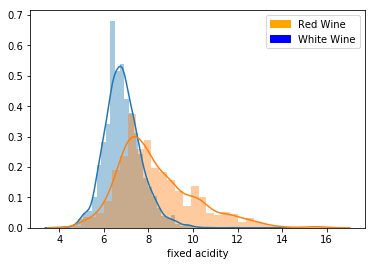

In [3]:
sns.distplot(white['fixed acidity'])
sns.distplot(red['fixed acidity'])

orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

- The White wine has a lower mean fixed acidity level and most of the values are located around the mean, signifying a lower standard deviation. 
- The Red wine has a higher mean fixed acidity level and standard deviation so more of the red wines are spread across fixed acidity levels.

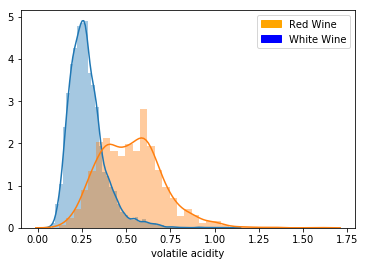

In [4]:
sns.distplot(white['volatile acidity'])
sns.distplot(red['volatile acidity'])

plt.legend(handles=[orange_patch, blue_patch])

- The White wine has a lower mean volative acidity level and most of the values are located around the mean, signifying a lower standard deviation. 
- The Red wine has a higher mean volatile acidity level (peaking twice) and standard deviation so more of the red wines are spread across fixed acidity levels.

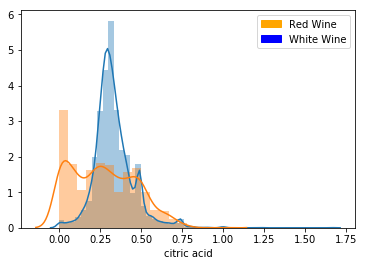

In [5]:
sns.distplot(white['citric acid'])
sns.distplot(red['citric acid'])

plt.legend(handles=[orange_patch, blue_patch])

- The White wine has an average mean citric acid level and most of the values are located around the mean, signifying a lower standard deviation. 
- The Red wine has three peaks of mean citric acid level (one lower, one around the same as white, and one higher) and standard deviation so more of the red wines are spread across fixed acidity levels.

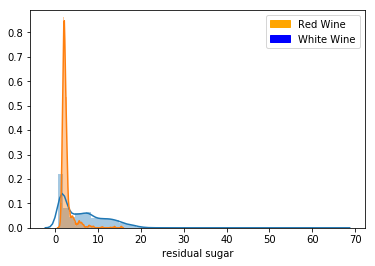

In [6]:
sns.distplot(white['residual sugar'])
sns.distplot(red['residual sugar'])

plt.legend(handles=[orange_patch, blue_patch])

- Here the two types of wine are switched. 
- The Red wine has a very low mean residual sugar level and also a very low standard deviation. Red wines typically do not have a lot of residual sugar as shown by the graph. 
- The White wine has a higher standard deviation and the mean residual sugar level stretches across several levels. 

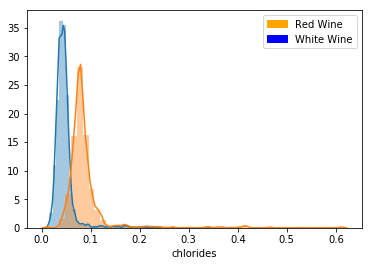

In [7]:
sns.distplot(white['chlorides'])
sns.distplot(red['chlorides'])

plt.legend(handles=[orange_patch, blue_patch])

- The White wine has a slightly lower mean chloride level and most of the values are located around the mean, signifying a lower standard deviation. 
- The Red wine has a slightly higher mean chloride level and most of the values are located around the mean, signifying a lower standard deviation. 

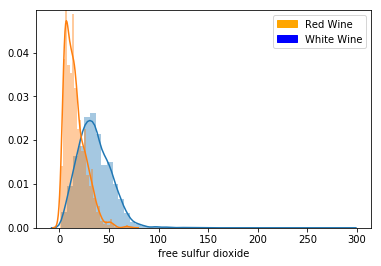

In [8]:
sns.distplot(white['free sulfur dioxide'])
sns.distplot(red['free sulfur dioxide'])

plt.legend(handles=[orange_patch, blue_patch])

- The White wine has a slightly higher mean free sulfur dioxide level and most of the values are located around the mean, signifying an average standard deviation. 
- The Red wine has a slightly lower mean free sulfur dioxide level and most of the values are located around the mean, signifying a lower standard deviation. 

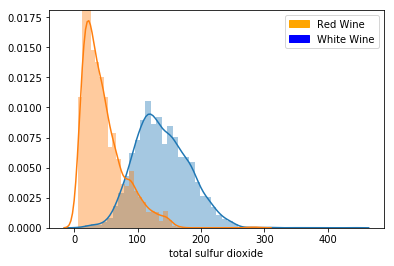

In [9]:
sns.distplot(white['total sulfur dioxide'])
sns.distplot(red['total sulfur dioxide'])

plt.legend(handles=[orange_patch, blue_patch])

- The White wine has a slightly higher mean total sulfur dioxide level and most of the values are located around the mean, signifying an average standard deviation. 
- The Red wine has a slightly lower mean total sulfur dioxide level and most of the values are located around the mean, signifying a lower standard deviation. 

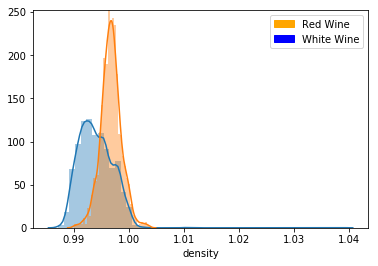

In [10]:
sns.distplot(white['density'])
sns.distplot(red['density'])

plt.legend(handles=[orange_patch, blue_patch])

- The White wine has a slightly lower mean density level and most of the values are located around the mean, signifying an average standard deviation. 
- The Red wine has a slightly higher mean density level and most of the values are located around the mean, signifying a lower standard deviation. 

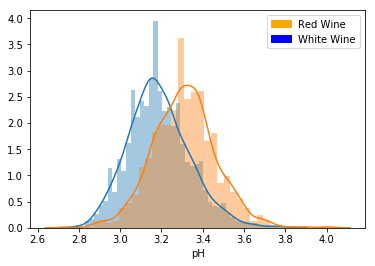

In [11]:
sns.distplot(white['pH'])
sns.distplot(red['pH'])

plt.legend(handles=[orange_patch, blue_patch])

- The White wine has a slightly lower mean pH level and most of the values are located around the mean, signifying an average standard deviation. 
- The Red wine has a slightly higher mean pH level and most of the values are located around the mean, signifying an average standard deviation. 

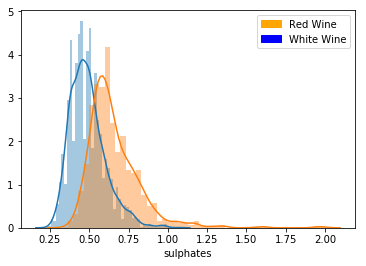

In [12]:
sns.distplot(white['sulphates'])
sns.distplot(red['sulphates'])

plt.legend(handles=[orange_patch, blue_patch])

- The White wine has a slightly lower mean free sulfur dioxide level and most of the values are located around the mean, signifying a lower standard deviation. 
- The Red wine has a slightly higher mean free sulfur dioxide level and most of the values are located around the mean, signifying a lower standard deviation. 

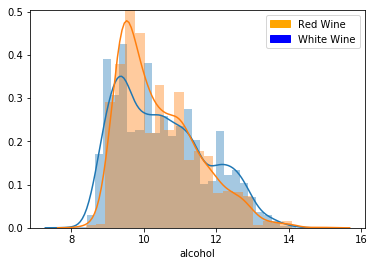

In [13]:
sns.distplot(white['alcohol'])
sns.distplot(red['alcohol'])

plt.legend(handles=[orange_patch, blue_patch])

- The distributions for mean alcohol levels are very similar between the White and Red wine. They are both slightly right skewed.

### 2) Unusual features or outliers present in the data

#### Outlier Notes
- We used code to automatically take out any values that were more than 5 standard deviations from the mean for each variable
- However, after performing further analysis using the data with these “outliers” removed, we saw that our predictions were even less accurate and significant


In [14]:
white2 = white[:]
for column in white2:
    white2 = white2[np.abs(white2[column] - white2[column].mean())<=(5*white2[column].std())]

print(white2.describe()) #Take out all outliers more than 5 sd's from the mean (76 white oultiers)

red2 = red[:]
for column in red2:
    red2 = red2[np.abs(red2[column] - red2[column].mean())<=(5*red2[column].std())]

print(red2.describe()) #Take out all outliers more than 5 sd's from the mean (43 red outliers)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4812.000000       4812.000000  4812.000000     4812.000000   
mean        6.849616          0.276188     0.331818        6.380175   
std         0.832708          0.096458     0.115108        4.974241   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.380000        9.900000   
max        10.700000          0.780000     0.910000       26.050000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4812.000000          4812.000000           4812.000000  4812.000000   
mean      0.044034            35.067436            137.827722     0.993998   
std       0.014426            16.233582             41.899990     0.002907   
min       0.009000             2.000000         

- Chloride, free sulfur dioxide, total sulfur dioxide, and pH all seem to be affected by outliers

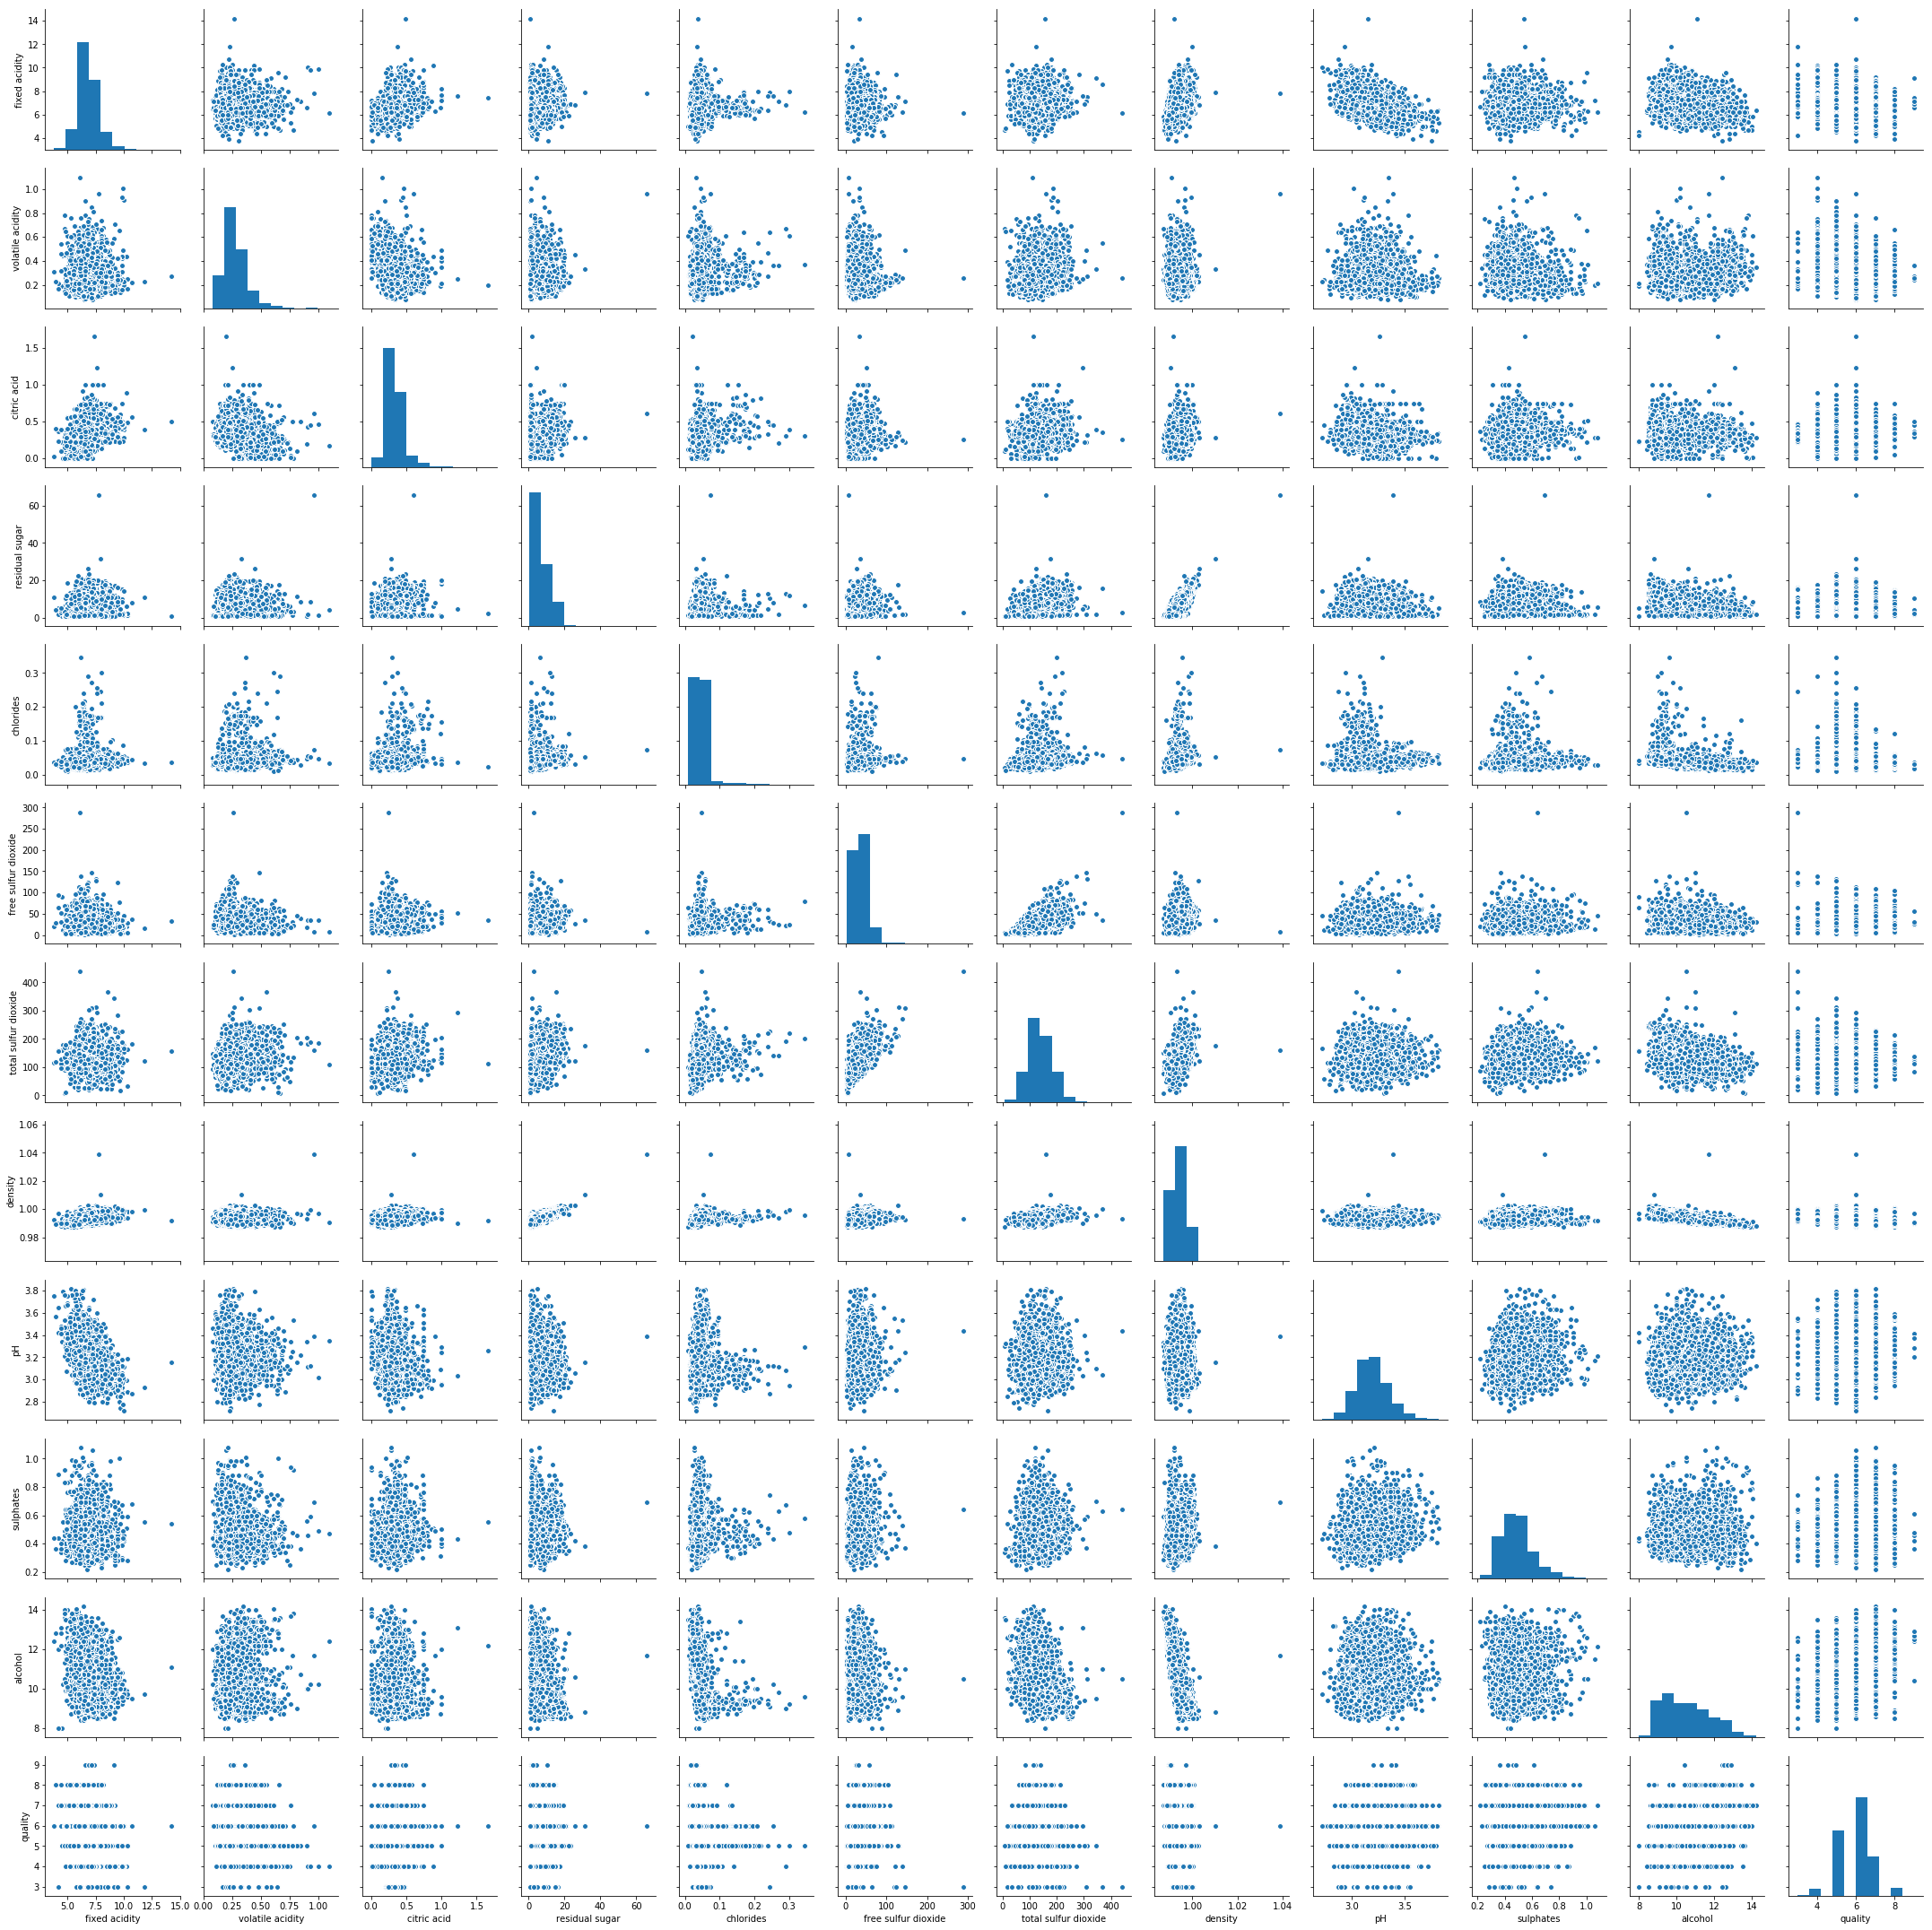

In [15]:
#Outliers
sns.pairplot(white) #much more normal than before

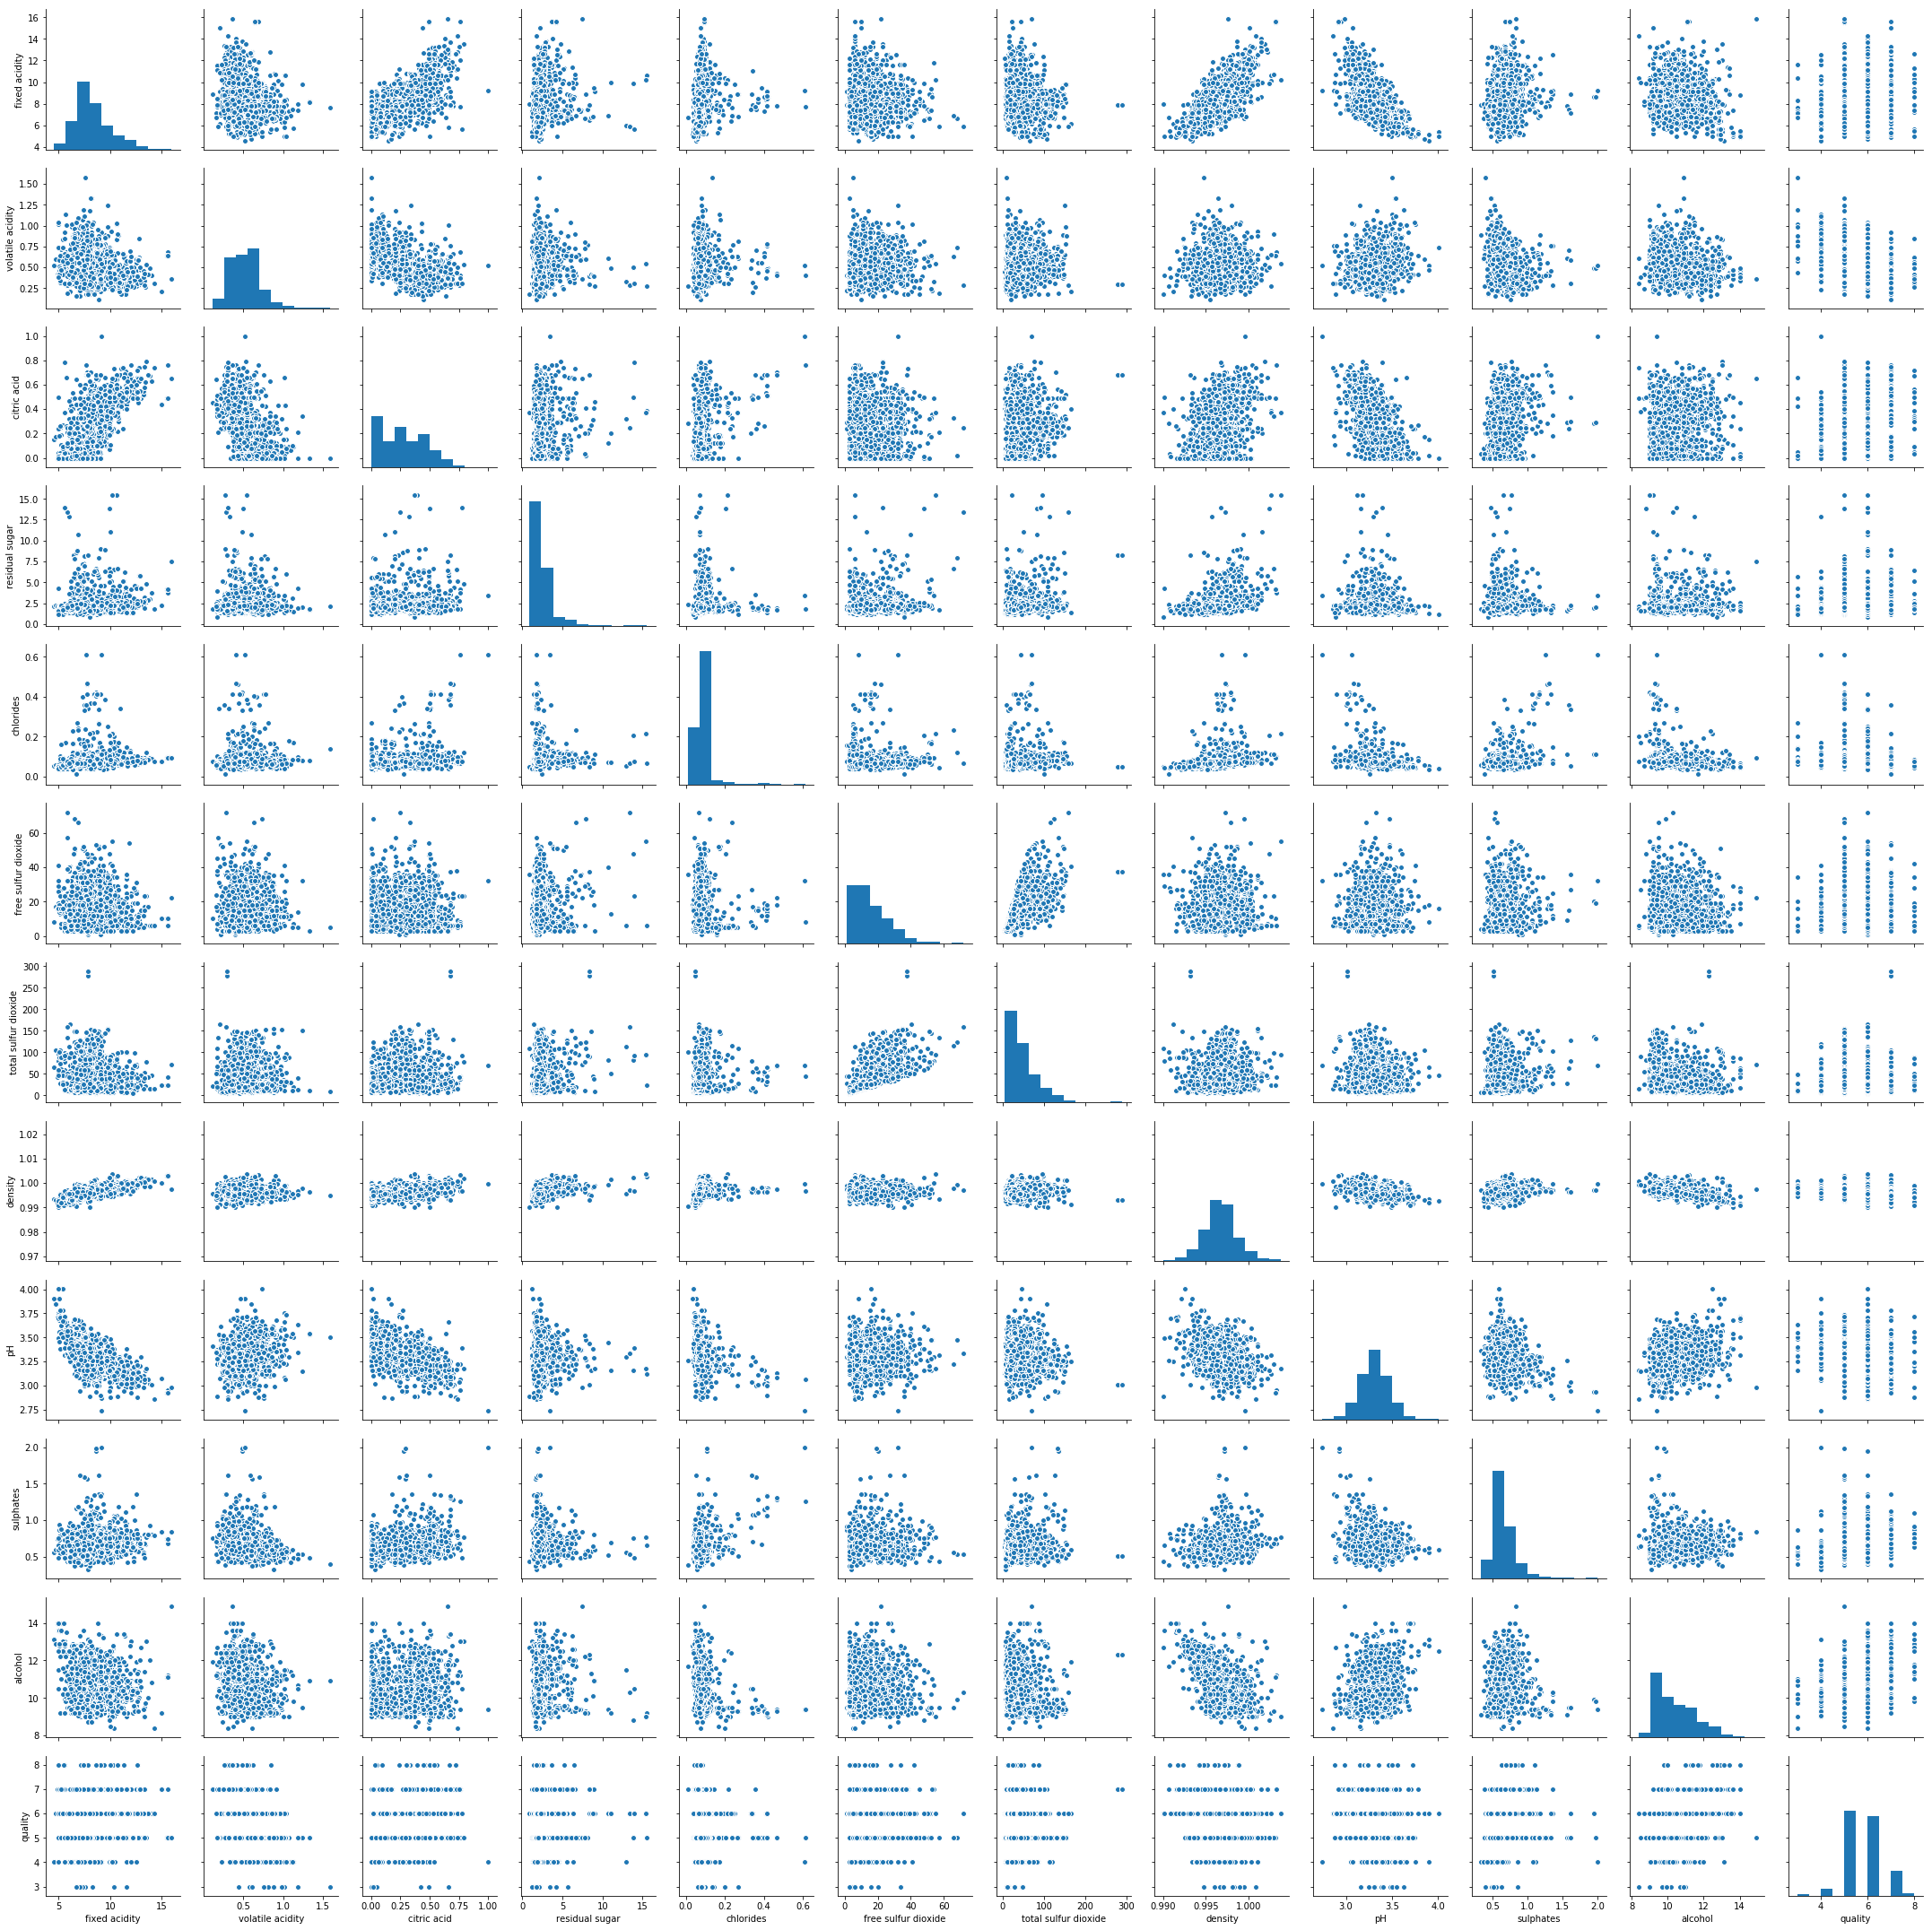

In [16]:
sns.pairplot(red) #much more normal than before

### 3) Potential Relationships That May Exist in the Data

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.04         0.30   
volatile acidity              -0.04              1.00        -0.17   
citric acid                    0.30             -0.17         1.00   
residual sugar                 0.08              0.05         0.10   
chlorides                      0.05              0.02         0.08   
free sulfur dioxide           -0.05             -0.10         0.11   
total sulfur dioxide           0.09              0.07         0.13   
density                        0.26             -0.01         0.16   
pH                            -0.43             -0.03        -0.16   
sulphates                     -0.02             -0.05         0.08   
alcohol                       -0.12              0.07        -0.08   
quality                       -0.10             -0.18        -0.01   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

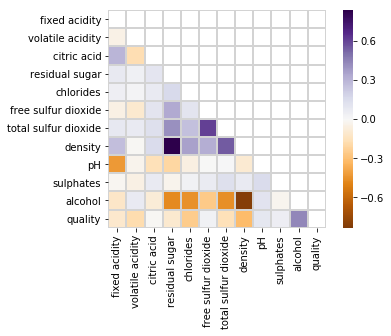

In [17]:
corr = white2.corr()
print(corr.round(2))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #delete top half of triangle

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgrey", linewidths=1, ax=ax)
plt.show()

### The following variables have fairly high correlations with one another
- Density and Residual Suger
- Free sulfur dioxide and total sulfer dioxide
- Density and total sulfer dioxide
- Density and alcohol

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.26         0.67   
volatile acidity              -0.26              1.00        -0.55   
citric acid                    0.67             -0.55         1.00   
residual sugar                 0.11              0.00         0.14   
chlorides                      0.09              0.06         0.20   
free sulfur dioxide           -0.15             -0.01        -0.06   
total sulfur dioxide          -0.11              0.08         0.04   
density                        0.67              0.02         0.36   
pH                            -0.68              0.23        -0.54   
sulphates                      0.18             -0.26         0.31   
alcohol                       -0.06             -0.20         0.11   
quality                        0.12             -0.39         0.23   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

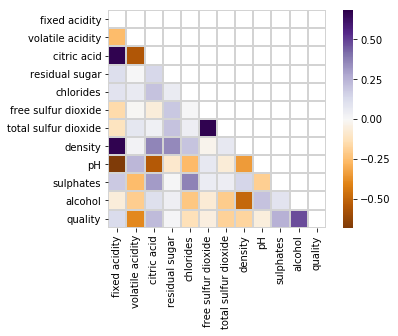

In [18]:
corr = red.corr()
print(corr.round(2))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #delete top half of triangle

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgrey", linewidths=1, ax=ax)
plt.show()

### The following variables have fialry high correlations with one another
- Citric Acid and fixed acidity
- Density and fixed acidity
- pH and fixed acidity
- Free sulfur dioxide and total sulfer dioxide
- Alcohol and quality
- Volatile acidity and citric acid
- pH and citric acid
- Alcohol and density

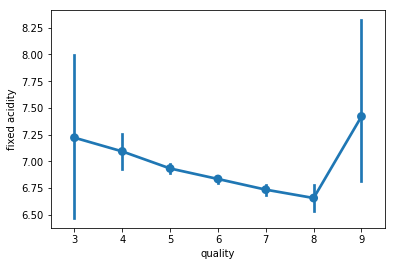

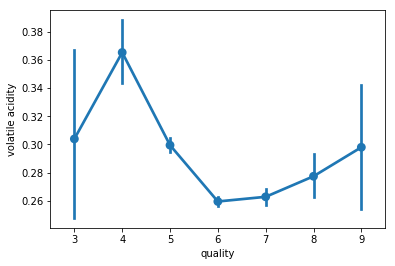

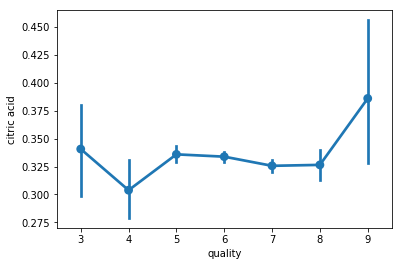

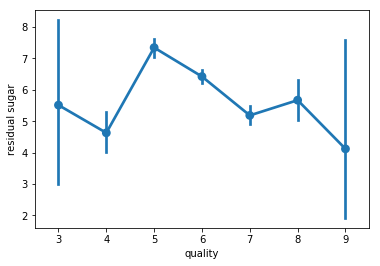

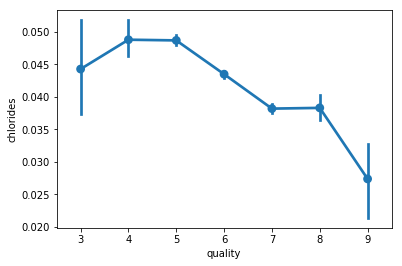

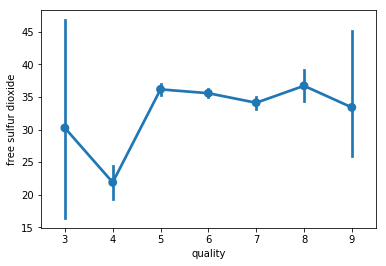

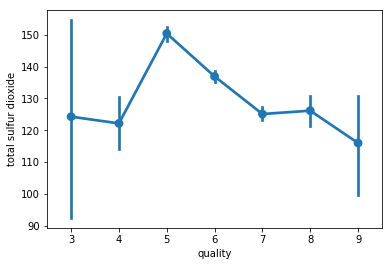

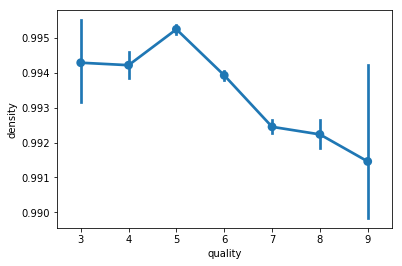

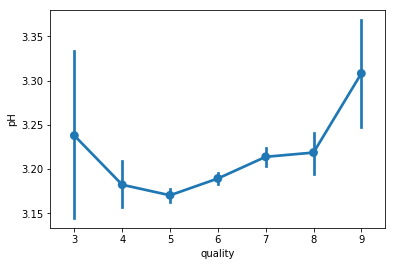

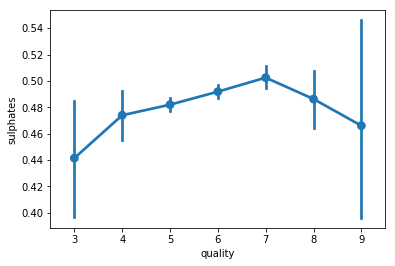

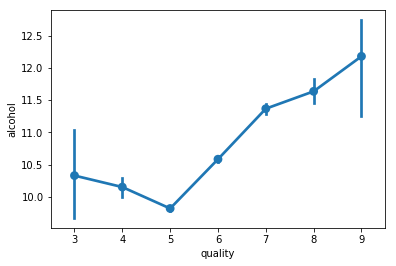

In [19]:
for i in list(white2)[0:11]:
    sns.pointplot(x='quality', y=i, data=white2)
    plt.show()

### General Patterns of Significant Interaction with Quality and:
- Fixed Acidity
- Volatile Acidity
- Chlorides
- Density
- pH
- Alcohol

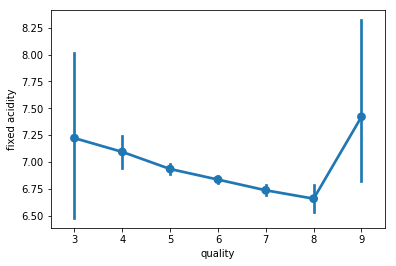

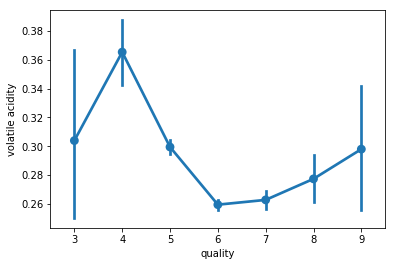

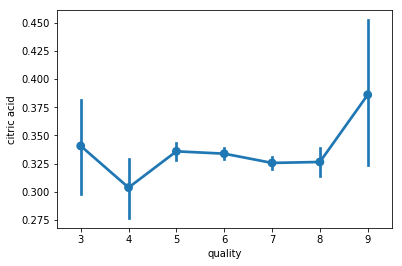

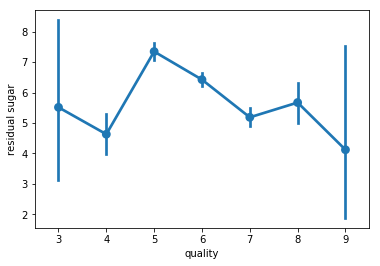

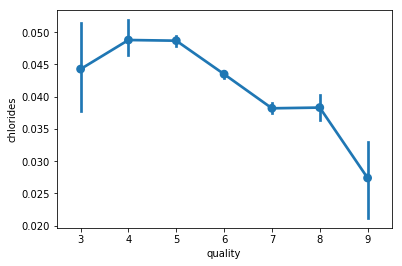

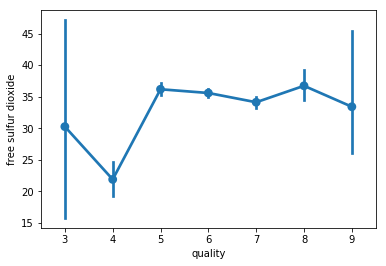

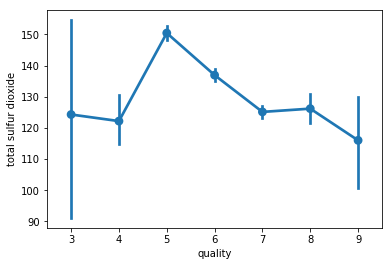

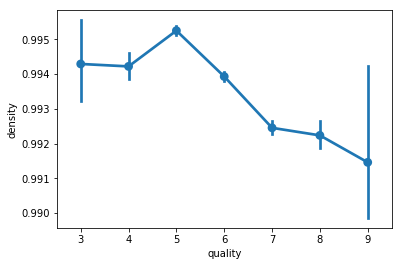

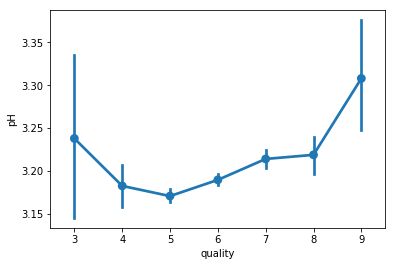

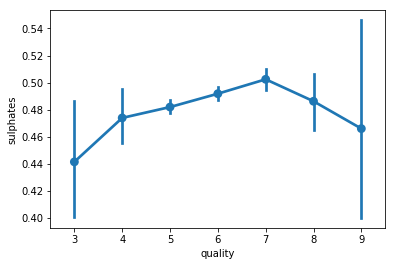

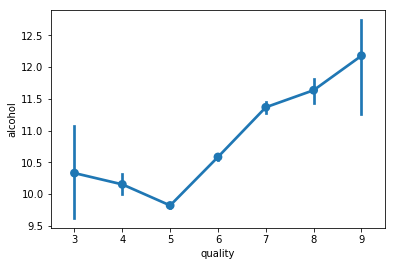

In [20]:
for i in list(red2)[0:11]:
    sns.pointplot(x='quality', y=i, data=white2)
    plt.show()

### General Patterns of Significant Interaction with Quality and:
- Fixed Acidity
- Volatile Acidity
- Chlorides
- Density
- pH
- Alcohol

## **III. Data Modeling**

In this section, students will fit a statistical model to the data for the purpose of insight and/or
prediction.
Students are allowed to fit any model they choose, ranging from simple models like linear regression to
more complex ones like random forests, or neural networks.
Students should explain their decisions regarding the choice of model, and if appropriate, the reasoning
behind the inclusion of predictive features. (Probably backed up by the findings in the exploratory data
analysis.)
If students fit a model to gain insight to the data, then explanations of the findings are necessary.
Students should explain the relationship between variables when possible. For example, explanations of
linear regression coefficients need to be included, or an explanation of what significance the principal
components have.
If students fit a model for predictive purposes, then care should be taken to separate training and
testing data. Students should perform some form of cross-validation to ensure that the model is not
overfitting features unique to the training data. A metric will need to be selected to show the predictive
performance of the model.

In [21]:
#Which variables are significant? (White)
regr = linear_model.LinearRegression()
white_y = white.quality
white_x = white.drop("quality", 1)
white_x_train, white_x_test, white_y_train, white_y_test = train_test_split(white_x, white_y, test_size= 0.30, random_state= 42)
est = sm.OLS(white_y_train, white_x_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.874e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        15:29:39   Log-Likelihood:                -3914.2
No. Observations:                3428   AIC:                             7850.
Df Residuals:                    3417   BIC:                             7918.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0512 

In [22]:
#Which variables are significant? (Red)
regr = linear_model.LinearRegression()
red_y = red.quality
red_x = red.drop("quality", 1)
red_x_train, red_x_test, red_y_train, red_y_test = train_test_split(red_x, red_y, test_size= 0.30, random_state= 42)
est = sm.OLS(red_y_train, red_x_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7619.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        15:29:39   Log-Likelihood:                -1103.7
No. Observations:                1119   AIC:                             2229.
Df Residuals:                    1108   BIC:                             2285.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0069 

In [23]:
#Random Forest (White Wine Quality)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(white_x_train, white_y_train)
print(sorted(zip(map(lambda white_x_train: round(white_x_train, 4), rf.feature_importances_), list(white_x_train)), 
             reverse=True))
preds = rf.predict(white_x_test)
mse = mean_squared_error(white_y_test, preds)
diff = white_y_test - preds
print(mse, diff)

[(0.2421, 'alcohol'), (0.1255, 'volatile acidity'), (0.1137, 'free sulfur dioxide'), (0.0708, 'pH'), (0.0684, 'total sulfur dioxide'), (0.0651, 'residual sugar'), (0.0643, 'chlorides'), (0.0639, 'sulphates'), (0.0637, 'fixed acidity'), (0.0617, 'density'), (0.0608, 'citric acid')]
0.3557846183673469 4656    0.132
3659    0.484
907     1.444
4352   -0.183
3271    0.175
4632   -0.218
2244   -0.214
1924   -1.202
3801    0.087
2634   -0.134
2827    0.174
79     -0.273
350    -0.025
1370    0.471
4480   -1.817
3783   -0.094
2890    0.870
3193   -0.725
1281    0.099
4388    0.344
653     0.635
2290    1.003
4101   -0.123
1921   -1.060
598     1.814
2067   -0.266
2794   -0.037
3826   -0.051
841     0.435
2643   -0.505
        ...  
112    -0.019
3024   -0.039
263     0.476
1393    0.537
1755    0.196
1186   -0.239
3909    0.944
56     -0.029
1309    0.941
695    -0.319
1833   -0.125
1614   -0.750
1670    0.388
1623    0.268
4583    0.212
2295    0.651
682     0.775
3485    1.108
3103    0.277

In [24]:
#Random Forest (White Wine Quality - Rounded)
preds_round = preds.round(0)
diff2 = preds_round - white_y_test
mse2 = mean_squared_error(white_y_test, preds_round)
print(mse2, diff2)

0.41020408163265304 4656    0.0
3659    0.0
907    -1.0
4352    0.0
3271    0.0
4632    0.0
2244    0.0
1924    1.0
3801    0.0
2634    0.0
2827    0.0
79      0.0
350     0.0
1370    0.0
4480    2.0
3783    0.0
2890   -1.0
3193    1.0
1281    0.0
4388    0.0
653    -1.0
2290   -1.0
4101    0.0
1921    1.0
598    -2.0
2067    0.0
2794    0.0
3826    0.0
841     0.0
2643    1.0
       ... 
112     0.0
3024    0.0
263     0.0
1393   -1.0
1755    0.0
1186    0.0
3909   -1.0
56      0.0
1309   -1.0
695     0.0
1833    0.0
1614    1.0
1670    0.0
1623    0.0
4583    0.0
2295   -1.0
682    -1.0
3485   -1.0
3103    0.0
1966   -1.0
4882    1.0
2754    0.0
286    -1.0
3957    1.0
3883    0.0
4235    0.0
4588    1.0
3377    0.0
1503    0.0
1971    0.0
Name: quality, Length: 1470, dtype: float64


In [25]:
#Random Forest (White Wine Quality - Rounded)
print(diff2.value_counts()) #68.4% of predictions correct

 0.0    1005
-1.0     237
 1.0     192
 2.0      18
-2.0      12
 3.0       6
Name: quality, dtype: int64


Cross-validated scores: [0.27329441 0.28821155 0.36996343 0.32569031 0.31427059]
0       0.0
1      -1.0
2       0.0
3       0.0
4       0.0
5       0.0
6      -1.0
7       0.0
8      -1.0
9       0.0
10      1.0
11      1.0
12      1.0
13      0.0
14      0.0
15     -1.0
16     -1.0
17     -2.0
18      0.0
19      0.0
20     -2.0
21     -1.0
22     -2.0
23      0.0
24     -1.0
25      0.0
26      0.0
27      0.0
28      0.0
29     -1.0
       ... 
4868    0.0
4869   -1.0
4870   -1.0
4871    0.0
4872    1.0
4873    0.0
4874    0.0
4875    0.0
4876    0.0
4877    0.0
4878    1.0
4879   -1.0
4880   -1.0
4881    0.0
4882    1.0
4883    0.0
4884    1.0
4885   -1.0
4886    0.0
4887   -2.0
4888    1.0
4889    0.0
4890    0.0
4891    0.0
4892    1.0
4893    0.0
4894    0.0
4895    0.0
4896    0.0
4897    0.0
Name: quality, Length: 4898, dtype: float64
 0.0    2606
-1.0    1053
 1.0    1003
-2.0     138
 2.0      83
 3.0      10
-3.0       4
-4.0       1
Name: quality, dtype: int64


NameError: name 'metrics' is not defined

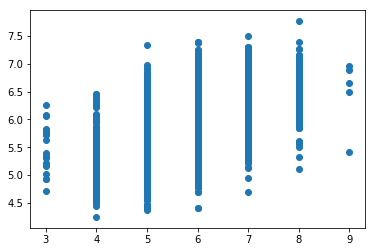

In [26]:
#Random Forest Cross Validation (White Wine Quality)
scores = cross_val_score(rf, white_x, white_y, cv=5)
print('Cross-validated scores:', scores)
cvpreds = cross_val_predict(rf, white_x, white_y, cv=5)
cv_diff = cvpreds.round(0) - white_y
plt.scatter(white_y, cvpreds)
print(cv_diff)
print(cv_diff.value_counts())

accuracy = metrics.r2_score(white_y, cv_preds.round(0))
print('Cross-Predicted Accuracy:', accuracy, cv_diff)

In [ ]:
#Random Forest (Red Wine Quality)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(red_x_train, red_y_train)
print(sorted(zip(map(lambda red_x_train: round(red_x_train, 4), rf.feature_importances_), list(red_x_train)), 
             reverse=True))
preds = rf.predict(red_x_test)
mse = mean_squared_error(red_y_test, preds)
diff = red_y_test - preds
print(mse, diff)

In [ ]:
#Random Forest (Red Wine Quality - Rounded)
preds_round = preds.round(0)
diff2 = preds_round - red_y_test
mse2 = mean_squared_error(red_y_test, preds_round)
print(mse2, diff2)

In [ ]:
#Random Forest (Red Wine Quality - Rounded)
print(diff2.value_counts()) #64.4% of predictions correct

In [ ]:
#Random Forest Cross Validation (Red Wine Quality)
scores = cross_val_score(rf, red_x, red_y, cv=5)
print('Cross-validated scores:', scores)
cvpreds = cross_val_predict(rf, red_x, red_y, cv=5)
cv_diff = cvpreds.round(0) - red_y
plt.scatter(red_y, cvpreds)
print(cv_diff)
print(cv_diff.value_counts())

accuracy = metrics.r2_score(red_y, cv_preds.round(0))
print('Cross-Predicted Accuracy:', accuracy, cv_diff)

In [ ]:
# Combine Red and White Wine datasets
red['winetype'] = 0
white['winetype'] = 1

In [ ]:
wine = white.append(pd.DataFrame(data = red), ignore_index=True)
wine.describe()

In [ ]:
#Which variables are significant?
regr = linear_model.LinearRegression()
wine_y = wine.winetype
wine_x = wine.drop("winetype", 1)
wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(wine_x, 
                    wine_y, test_size= 0.30, random_state= 42)
est = sm.OLS(wine_y_train, wine_x_train)
est2 = est.fit()
print(est2.summary())

In [ ]:
#Random forest (Red or White Wine?)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(wine_x_train, wine_y_train)
print(sorted(zip(map(lambda wine_x_train: round(wine_x_train, 4), rf.feature_importances_), list(wine_x_train)), 
             reverse=True))
preds = rf.predict(wine_x_test)
mse = mean_squared_error(wine_y_test, preds)
diff = wine_y_test - preds
print(mse, diff)

In [ ]:
#Random forest (Red or White Wine?)
preds_round = preds.round(0)
diff2 = preds_round - wine_y_test
mse2 = mean_squared_error(wine_y_test, preds_round)
print(mse2, diff2)
diff2.value_counts()

Random forest (Red or White Wine?)
- 99.33% correct predictions

In [ ]:
#Random Forest Cross Validation (Red or White Wine)
scores = cross_val_score(rf, wine_x, wine_y, cv=5)
print('Cross-validated scores:', scores)
cvpreds = cross_val_predict(rf, wine_x, wine_y, cv=5)
cv_diff = cvpreds.round(0) - wine_y
plt.scatter(wine_y, cvpreds)
print(cv_diff)
print(cv_diff.value_counts())

accuracy = metrics.r2_score(wine_y, cv_preds.round(0))
print('Cross-Predicted Accuracy:', accuracy, cv_diff)

In [ ]:
#Random forest (Red or White Wine?)
df = wine_y_test.to_frame()
df['preds'] = pd.Series(preds_round, index=df.index)
df

## Alternate Attempts and Data Analysis
- Kmeans did not classify very well at all
- Our Neural Network worked okay, but it did not produce results as good as our Random Forest
- Random Forest after taking out outliers was also okay, but again produced worse results

In [ ]:
#KMEANS
kmeans = KMeans(n_clusters= 11)
kmeans.fit(white_x_train)
k_preds = kmeans.predict(white_x_train)
print(k_preds)
plt.scatter(white_x_train.iloc[:, 0], white_x_train.iloc[:, 1], c=k_preds, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
#NEURAL NETWORK
white_x_train_scaled = preprocessing.scale(white_x_train)
white_x_test_scaled = preprocessing.scale(white_x_test)
#scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
#white_x_train_scaled = scaler.fit_transform(white_x_train) 
#white_x_test_scaled = scaler.fit_transform(white_x_test)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001, activation = 'relu',
                     solver='lbfgs', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(white_x_train_scaled, white_y_train)      
nn_preds = clf.predict(white_x_test_scaled)
diff3 = nn_preds - white_y_test
mse3 = mean_squared_error(white_y_test, nn_preds)
acc = accuracy_score(white_y_test, nn_preds)
print(acc, mse3, diff3, diff3.value_counts())

In [ ]:
#Random Forest (White Wine Quality - Outliers Removed)
regr = linear_model.LinearRegression()
white2_y = white2.quality
white2_x = white2.drop("quality", 1)
white2_x_train, white2_x_test, white2_y_train, white2_y_test = train_test_split(white2_x, 
                    white2_y, test_size= 0.30, random_state= 42)
est = sm.OLS(white2_y_train, white2_x_train)
est2 = est.fit()
print(est2.summary())

In [ ]:
#Random Forest (White Wine Quality - Outliers Removed)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(white2_x_train, white2_y_train)
print(sorted(zip(map(lambda white2_x_train: round(white2_x_train, 4), rf.feature_importances_), list(white2_x_train)), 
             reverse=True))
preds = rf.predict(white2_x_test)
mse = mean_squared_error(white2_y_test, preds)
diff = white2_y_test - preds
print(mse, diff)

In [ ]:
#Random Forest (White Wine Quality - Outliers Removed)
preds_round = preds.round(0)
diff2 = preds_round - white2_y_test
mse2 = mean_squared_error(white2_y_test, preds_round)
print(mse2, diff2)

diff2.value_counts() #66.7% predictions correct which is 2% less than with the "outliers"

## Citations and References
 - [1] http://www.vinhoverde.pt/
 - [2] https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub
 - [3] http://www.wineintelligence.com/about-us/case-studies/cvrvv/